<a href="https://colab.research.google.com/github/fabarroso/MVP1/blob/main/MVP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##          **MVP1 - Acidentes Ferrovi√°rios**

Nome: Fabio de Andrade Barroso

Matricula:4052025000158

Dataset original:

https://dados.antt.gov.br/dataset/relatorio-de-acompanhamento-de-acidentes-ferroviarios-raaf/resource/3a191a68-837b-4359-bb69-93f9b8e49ff1

Acidentes ferrovi√°rios podem causar n√£o apenas preju√≠zos materiais significativos, mas tamb√©m colocar em risco a vida de passageiros,
trabalhadores e comunidades pr√≥ximas √†s linhas f√©rreas.

A an√°lise de dados nos permite identificar padr√µes, causas frequentes e fatores de risco associados, possibilitando assim a implementa√ß√£o de medidas preventivas e a melhoria das pol√≠ticas de seguran√ßa.



**Descri√ß√£o do problema**


O problema consiste em analisar e explorar os dados de acidentes ferrovi√°rios com trens no Brasil entre dezembro de 2020 e dezembro de 2024.
O dataset cont√©m informa√ß√µes como data, tipo de acidente, causa presumida, regi√£o, linha, entre outros. O objetivo √© identificar padr√µes, causas frequentes por meio da an√°lise de vari√°veis envolvidas em cada ocorr√™ncia.

**Hip√≥teses levantadas**

*   Existe uma associa√ß√£o entre a causa direta do acidente e a ocorr√™ncia de interrup√ß√£o no servi√ßo ferrovi√°rio?
*   Estados ou concession√°rias espec√≠ficas apresentam mais casos?
*   Certos tipos de acidentes est√£o mais associados √† fatalidades?

**Tipo de Problema**

Este √© um problema de classifica√ß√£o, pois, a maior parte das vari√°veis s√£o categ√≥ricas, tendo como os exemplos: tipo de acidente, existencia de vitimas, gravidade; permtindo assim aplicar modelos para prever classes e tomar decis√µes com base em categorias.

**Importa√ß√£o das Bibliotecas Necess√°rias e Carga de Dados**

****
As bibliotecas escolhidas e carregadas no c√≥digo foram fundamentais para realizar uma an√°lise explorat√≥ria de dados (EDA), tornando a leitura mais eficiente, possibilitando a manipula√ß√£o e limpeza, permitindo an√°lises estatisticas e visualiza√ß√µes claras e informativas.

Foi utilizado pd.set_option do Pandas, evitando assim que colunas ou textos ficassem truncados, tornando a EDA mais f√°cil de ser compreendida.

O dataset foi carregado diretamente de uma URL no GitHub, utilizando pd.read_csv, com a configura√ß√£o de delimitador para ponto e v√≠rgula (;) e codifica√ß√£o adequada para caracteres especiais (ISO-8859-1).
****

In [1]:
## Carga de bibliotecas utilizadas
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

In [2]:
##Carregamento dos Dados
# URL GitHub
url = 'https://raw.githubusercontent.com/fabarroso/acidentes-ferroviarios/main/Acidentes_Ferroviarios.csv'

# Carregamento do dataset
df = pd.read_csv(url, delimiter=';', encoding='ISO-8859-1')

# Exibe as primeiras linhas
print(df.head().to_string())

  Gravidade Concessionaria Data_Ocorrencia Hora_Ocorrencia  UF                Municipio                       Linha  Quil√¥metro_Inicial  Quil√¥metro_Final    Esta√ß√£o_Anterior Esta√ß√£o_Posterior    Per√≠metro_Urbano                       Causa_direta Causa_contibutiva         Natureza  Interrup√ß√£o  N_Trem  Prefixo Double_Stack Servi√ßo_Transporte  N_feridos  N_obitos                                                                                      Mercadoria                                                   Equipagem Outra_Ferrovia   PN Preju√≠zo_Financeiro
0       Sim            FTL      12/01/2020           16:00  PE  Jaboatao dos Guararapes           Tronco Sul Recife               5.000             5.001          Jorge Lins   Entroncamento 1                 N√£o  Casos Fortuitos ou de For√ßa Maior     Animal na via          Colis√£o          0.0       0      NaN          NaN                NaN          0         0                                                             

**An√°lise e Tratamento de Dados**

****

O dataset cont√©m 2.973 entradas e 27 colunas, abrangendo diversas informa√ß√µes sobre os acidentes ferrovi√°rios no Brasil. As colunas variam desde atributos categ√≥ricos, como gravidade, concession√°ria e causa direta, at√© vari√°veis num√©ricas, como quil√¥metro inicial e quil√¥metro final, que indicam a localiza√ß√£o dos acidentes.

Atrav√©s do uso do m√©todo df.info(), obtivemos informa√ß√µes sobre os tipos de dados e a quantidade de valores n√£o nulos em cada coluna. A maioria das colunas √© categ√≥rica, representando caracter√≠sticas como a gravidade do acidente, a concession√°ria envolvida e as esta√ß√µes ferrovi√°rias. Al√©m disso, vari√°veis num√©ricas como os quil√¥metros de ocorr√™ncia do acidente foram identificadas, permitindo uma an√°lise mais detalhada sobre a distribui√ß√£o geogr√°fica dos incidentes.

O gr√°fico de barras gerado a partir de df.dtypes.value_counts() visualiza a distribui√ß√£o dos tipos de dados, oferecendo uma vis√£o clara sobre quantas colunas s√£o categ√≥ricas, num√©ricas e de outros tipos.

Para entender melhor a distribui√ß√£o das vari√°veis num√©ricas, como quilometro_inicial e quilometro_final, foram gerados histogramas. Estes gr√°ficos ajudam a visualizar como os dados est√£o distribu√≠dos dentro de intervalos de valores espec√≠ficos e identificar poss√≠veis outliers ou padr√µes de concentra√ß√£o.


****

Total de linhas: 2973
Total de colunas: 27

--------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gravidade            2973 non-null   object 
 1   Concessionaria       2973 non-null   object 
 2   Data_Ocorrencia      2973 non-null   object 
 3   Hora_Ocorrencia      2973 non-null   object 
 4   UF                   2973 non-null   object 
 5   Municipio            2973 non-null   object 
 6   Linha                2973 non-null   object 
 7   Quil√¥metro_Inicial   2973 non-null   float64
 8   Quil√¥metro_Final     2927 non-null   float64
 9   Esta√ß√£o_Anterior     2973 non-null   object 
 10  Esta√ß√£o_Posterior    2973 non-null   object 
 11  Per√≠metro_Urbano     2973 non-null   object 
 12  Causa_direta         2973 non-null   object 
 13  Causa_contibutiva    2906 non-null 

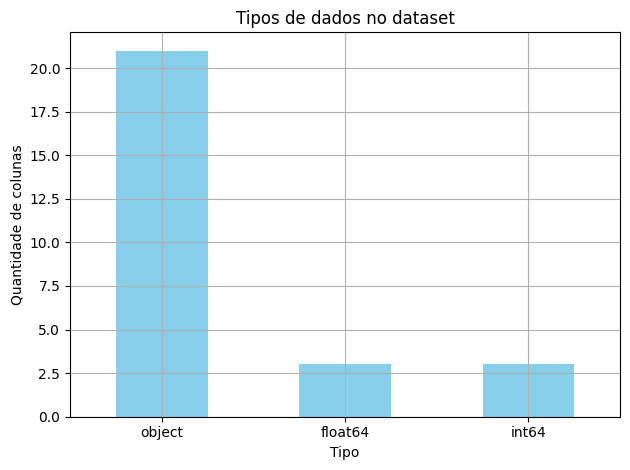


------------------------------------------------------------------------------------------------------------------------------------------------------



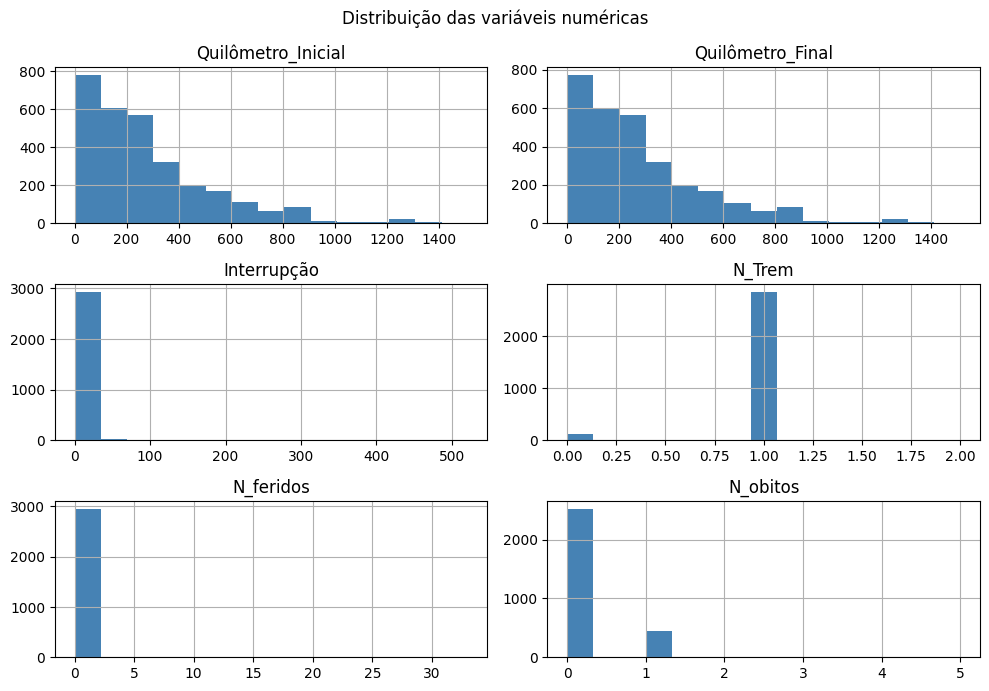

In [3]:
# Dimens√£o do dataset
print(f"Total de linhas: {df.shape[0]}")
print(f"Total de colunas: {df.shape[1]}")

print("\n" + "-"*50 + "\n")

# Informa√ß√µes dos tipos de dados
df.info()

print("\n" + "-"*90 + "\n")

# Gr√°fico de barras com o tipo de dado por coluna
type_counts = df.dtypes.value_counts()

type_counts.plot(kind='bar', color='skyblue')
plt.title('Tipos de dados no dataset')
plt.xlabel('Tipo')
plt.ylabel('Quantidade de colunas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(True)
plt.show()

print("\n" + "-"*150 + "\n")

# Histograma de vari√°veis num√©ricas
df.select_dtypes(include=['int64', 'float64']).hist(bins=15,
                 figsize=(10, 7), color='steelblue')
plt.suptitle('Distribui√ß√£o das vari√°veis num√©ricas')
plt.tight_layout()
plt.show()

****

Foi realizada uma padroniza√ß√£o inicial dos nomes das colunas a fim de remover os espa√ßos em branco, converter todos os nomes para minusculos, substituir os espa√ßos por underline '_', tamb√©m remover acentua√ß√µes e caracter especial; resultando assim em um dataset com nomes de colunas padronizadas.

Nesse dataset n√£o h√° registros repetidos.

A coluna data_ocorrencia foi analisada e convertida para datetime para garantir que todos os dados estivessem v√°lidos, permitindo assim a realiza√ß√£o da EDA.

****

In [4]:
#Padroniza√ß√£o dos nomes das colunas
df.columns = (df.columns
              .str.strip()                     # Remove espa√ßos no in√≠cio/fim
              .str.lower()                     # Converte para min√∫sculas
              .str.replace(' ', '_')           # Substitui espa√ßos por underline
              .str.normalize('NFKD')           # Remove acentua√ß√£o
              .str.encode('ascii', errors='ignore')
              .str.decode('utf-8'))

# Exibe colunas
print("Lista de Atributos do Dataset:\n")
for col in df.columns:
    print(col)

print("\n" + "-"*50 + "\n")

# Remo√ß√£o de duplicatas
print("\nDuplicatas encontradas:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

print("\n" + "-"*50 + "\n")

# Convers√£o da coluna de data_ocorrencia para datetima
try:

    df['data_ocorrencia'] = pd.to_datetime(df['data_ocorrencia'], errors='coerce', dayfirst=True)

    print("\nColuna 'data_ocorrencia' convertida com sucesso para datetime.")
    print(df['data_ocorrencia'].head())  # Exibe os primeiros valores

   # Verifica se h√° valores nulos ap√≥s a convers√£o
    if df['data_ocorrencia'].isnull().any():
        print("\nHouve problemas na convers√£o de algumas datas.")
    else:
        print("\nTodas as datas foram convertidas corretamente.")

except KeyError:
    print("\nA coluna 'data_ocorrencia' n√£o foi encontrada no DataFrame.")

Lista de Atributos do Dataset:

gravidade
concessionaria
data_ocorrencia
hora_ocorrencia
uf
municipio
linha
quilometro_inicial
quilometro_final
estacao_anterior
estacao_posterior
perimetro_urbano
causa_direta
causa_contibutiva
natureza
interrupcao
n_trem
prefixo
double_stack
servico_transporte
n_feridos
n_obitos
mercadoria
equipagem
outra_ferrovia
pn
prejuizo_financeiro

--------------------------------------------------


Duplicatas encontradas: 0

--------------------------------------------------


Coluna 'data_ocorrencia' convertida com sucesso para datetime.
0   2020-01-12
1   2020-03-12
2   2020-04-12
3   2020-04-12
4   2020-05-12
Name: data_ocorrencia, dtype: datetime64[ns]

Todas as datas foram convertidas corretamente.


**Convers√£o de Tipos de Dados**
****
Foi realizada a convers√£o de todas as colunas do tipo object ‚Äî que normalmente representam vari√°veis categ√≥ricas em formato textual ‚Äî para o tipo category, com o intuito de otimizar o uso de mem√≥ria e obter melhora no desempenho em algumas opera√ß√µes, como agrupamentos e Machine Learning.

****

In [5]:
# Convers√£o de tipos de dados
print("\nTipos de dados antes da convers√£o:")
print(df.dtypes)

# Convertendo vari√°veis categ√≥ricas para o tipo 'category' para otimizar mem√≥ria
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

# Exibindo os tipos de dados ap√≥s a convers√£o
print("\nTipos de dados ap√≥s convers√£o:")
print(df.dtypes)


Tipos de dados antes da convers√£o:
gravidade                      object
concessionaria                 object
data_ocorrencia        datetime64[ns]
hora_ocorrencia                object
uf                             object
municipio                      object
linha                          object
quilometro_inicial            float64
quilometro_final              float64
estacao_anterior               object
estacao_posterior              object
perimetro_urbano               object
causa_direta                   object
causa_contibutiva              object
natureza                       object
interrupcao                   float64
n_trem                          int64
prefixo                        object
double_stack                   object
servico_transporte             object
n_feridos                       int64
n_obitos                        int64
mercadoria                     object
equipagem                      object
outra_ferrovia                 object
pn           

**Verifica√ß√£o e Tratamento de Valores Nulos**
(Avaliar)****
- Na verifica√ß√£o ficou constatado que haviam 9 colunas com valores nulos, afetando um total de 5513 valores em 2973 linhas e ap√≥s o preenchimento, nenhuma coluna apresentou valor nulo.

- Para a coluna num√©rica, o valor nulo foi preenchido com a mediana. A mediana por ser uma medida robusta e que n√£o √© influenciada por outliers (valores extremos), tornou-se uma escolha confi√°vel para dados num√©ricos. Ao usar a mediana, mantivemos o comportamento central dos dados sem distor√ß√µes causadas por valores at√≠picos.

- Para as 8 colunas categ√≥ricas, os valores nulos foram preenchidos com a moda (o valor mais frequente) de cada coluna. Isso ajuda a manter a consist√™ncia dos dados, principalmente em vari√°veis como categorias ou classes, onde a moda representa a categoria mais comum, evitando a introdu√ß√£o de valores arbitr√°rios que poderiam prejudicar a an√°lise posterior.

****

In [6]:
# Substituir valores de texto nulo por np.nan
df.replace(['', ' ', '  ', 'nan', 'NaN', 'N/A'], np.nan, inplace=True)

# Verificando os valores nulos no dataset
missing_data = df.isnull().sum().to_frame(name='Total de Nulos')
missing_data['% de Nulos'] = (df.isnull().mean() * 100).round(2)
missing_data = missing_data[missing_data['Total de Nulos'] > 0]

print("\nValores Nulos no Dataset antes do preenchimento:")
print(missing_data)

print("\n" + "-"*50 + "\n")

# Identificando colunas num√©ricas e categ√≥ricas
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Remover a coluna 'gravidade' da lista de categ√≥ricas
categorical_cols = [col for col in categorical_cols if col != 'gravidade']

# Listas para rastrear colunas ajustadas
adjusted_numerical_cols = []
adjusted_categorical_cols = []

# Preenchendo num√©ricos com mediana
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())
        adjusted_numerical_cols.append(col)

# Preenchendo categ√≥ricos com moda
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode().iloc[0])
        adjusted_categorical_cols.append(col)

# Verifica√ß√£o final
missing_data_after = df.isnull().sum().to_frame(name='Total de Nulos Ap√≥s Preenchimento')
missing_data_after['% de Nulos Ap√≥s Preenchimento'] = (df.isnull().mean() * 100).round(2)
missing_data_after = missing_data_after[missing_data_after['Total de Nulos Ap√≥s Preenchimento'] > 0]

print("\nValores Nulos no Dataset ap√≥s o preenchimento:")
print(missing_data_after)

print("\n" + "-"*50 + "\n")

print("\nColunas Num√©ricas Ajustadas com a Mediana:")
print(adjusted_numerical_cols if adjusted_numerical_cols else "Nenhuma coluna num√©rica foi ajustada.")

print("\n" + "-"*50 + "\n")

print("\nColunas Categ√≥ricas Ajustadas com a Moda:")
print(adjusted_categorical_cols if adjusted_categorical_cols else "Nenhuma coluna categ√≥rica foi ajustada.")


Valores Nulos no Dataset antes do preenchimento:
                     Total de Nulos  % de Nulos
quilometro_final                 46        1.55
causa_contibutiva                67        2.25
prefixo                         126        4.24
double_stack                    120        4.04
servico_transporte              120        4.04
mercadoria                      236        7.94
equipagem                       127        4.27
outra_ferrovia                 2856       96.06
prejuizo_financeiro            1815       61.05

--------------------------------------------------


Valores Nulos no Dataset ap√≥s o preenchimento:
Empty DataFrame
Columns: [Total de Nulos Ap√≥s Preenchimento, % de Nulos Ap√≥s Preenchimento]
Index: []

--------------------------------------------------


Colunas Num√©ricas Ajustadas com a Mediana:
['quilometro_final']

--------------------------------------------------


Colunas Categ√≥ricas Ajustadas com a Moda:
['causa_contibutiva', 'prefixo', 'double_stack',

**Detec√ß√£o e Remo√ß√£o de Outliers**

****
Outliers podem distorcer a m√©dia, desvio padr√£o, e outros par√¢metros estat√≠sticos. Quando h√° valores muito extremos (por exemplo, um acidente com centenas de v√≠timas ou um custo financeiro muito elevado em compara√ß√£o com os outros acidentes), esses valores podem afetar fortemente as m√©dias e desvios padr√£o, tornando as estat√≠sticas descritivas menos representativas da maioria dos dados.

A remo√ß√£o de outliers foi necess√°ria para garantir que as estat√≠sticas descritivas refletissem a distribui√ß√£o real dos dados, sem serem distorcidas por valores extremos que poderiam representar eventos raros ou erros de dados. Isso resultou em:

* M√©dias mais realistas.
* Desvios padr√£o mais precisos, refletindo a varia√ß√£o natural dos dados.
* Percentis mais representativos da distribui√ß√£o central.
* Valores m√≠nimos e m√°ximos mais razo√°veis e √∫teis.

Ao remover outliers, o dataset tornou-se mais adequado para modelos de machine learning e an√°lises, permitindo que eles aprendam padr√µes mais gerais e n√£o se concentrem em casos extremos que n√£o s√£o representativos do comportamento t√≠pico de acidentes ferrovi√°rios.
****

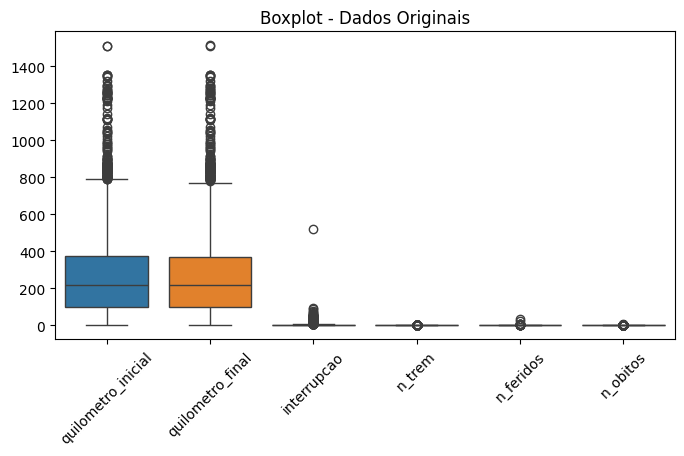


------------------------------------------------------------------------------------------


N√∫mero de linhas ap√≥s remo√ß√£o de outliers: 1874

------------------------------------------------------------------------------------------



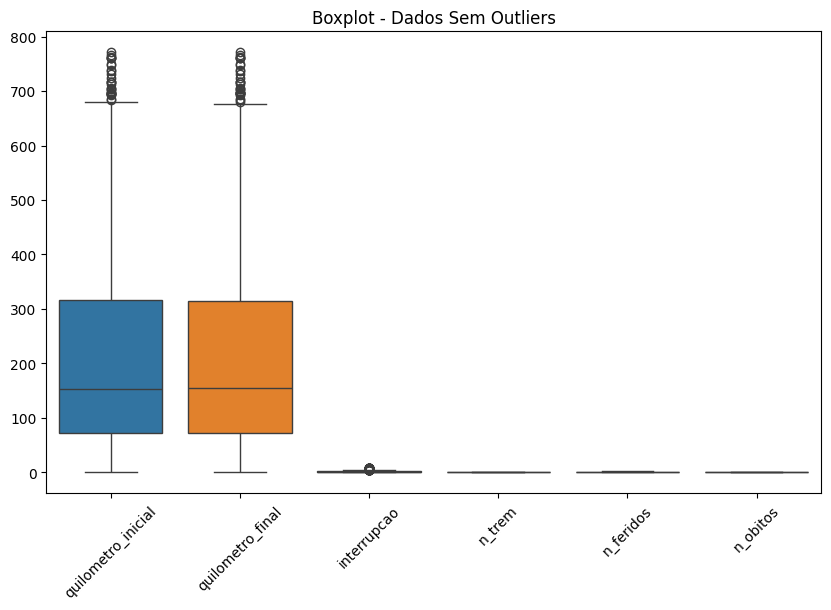

In [7]:
# Detec√ß√£o e remo√ß√£o de outliers (usando IQR)

## Visualiza√ß√£o dos Outliers antes da remo√ß√£o
# Gr√°fico de boxplot para visualiza√ß√£o dos outliers antes da remo√ß√£o
plt.figure(figsize=(8,4))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplot - Dados Originais')
plt.xticks(rotation=45)
plt.show()

print("\n" + "-"*90 + "\n")

# Detectando outliers e removendo linhas com outliers
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Filtrando as linhas que n√£o s√£o outliers
df_outliers_removed = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"\nN√∫mero de linhas ap√≥s remo√ß√£o de outliers: {df_outliers_removed.shape[0]}")

print("\n" + "-"*90 + "\n")

## Visualiza√ß√£o dos Outliers ap√≥s a remo√ß√£o
# Gr√°fico de boxplot para visualiza√ß√£o dos dados sem outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df_outliers_removed[numerical_cols])
plt.title('Boxplot - Dados Sem Outliers')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Estat√≠sticas descritivas
# Armazena a descri√ß√£o em uma vari√°vel
desc = df.describe(include='all').transpose()
# Ajusta a visualiza√ß√£o para mostrar todas as colunas no terminal
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 1000):
    print("Estat√≠sticas descritivas por coluna:\n")
    print(desc)

Estat√≠sticas descritivas por coluna:

                      count unique                                                                                           top  freq                           mean                  min                  25%                  50%                  75%                  max         std
gravidade              2973      2                                                                                           N√£o  1596                            NaN                  NaN                  NaN                  NaN                  NaN                  NaN         NaN
concessionaria         2973     13                                                                                           RMS   858                            NaN                  NaN                  NaN                  NaN                  NaN                  NaN         NaN
data_ocorrencia        2973    NaN                                                                             

**M√©dia / Desvio Padr√£o**
****

A proximidade da m√©dia e do desvio padr√£o sugere uma tend√™ncia est√°vel no comportamento dos acidentes. Se o n√∫mero de acidentes for est√°vel ao longo do tempo, com pouca varia√ß√£o, isso pode significar que as pol√≠ticas existentes est√£o funcionando de maneira eficaz para manter a frequ√™ncia de acidentes sob controle.

A proximidade entre a m√©dia e o desvio padr√£o no dataset de acidentes ferrovi√°rios sugere que os dados s√£o relativamente consistentes e n√£o apresentam grandes flutua√ß√µes. Isso √© um indicativo de uma distribui√ß√£o est√°vel, onde os valores centrais s√£o confi√°veis e as ocorr√™ncias s√£o previs√≠veis dentro de um intervalo estreito.
****

M√©dia das vari√°veis num√©ricas:
 quilometro_inicial    277.398091
quilometro_final      275.814857
interrupcao             4.124285
n_trem                  0.960309
n_feridos               0.337370
n_obitos                0.154053
dtype: float64

Desvio Padr√£o das vari√°veis num√©ricas:
 quilometro_inicial    252.120316
quilometro_final      250.036250
interrupcao            12.384543
n_trem                  0.198680
n_feridos               0.936873
n_obitos                0.374778
dtype: float64


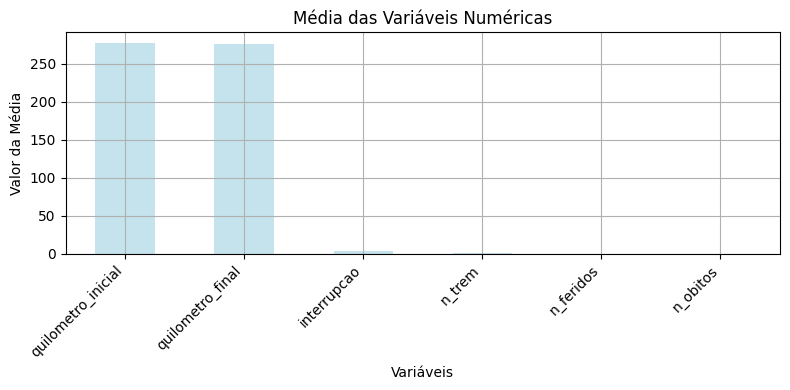


------------------------------------------------------------------------------------------------------------------------------------------------------



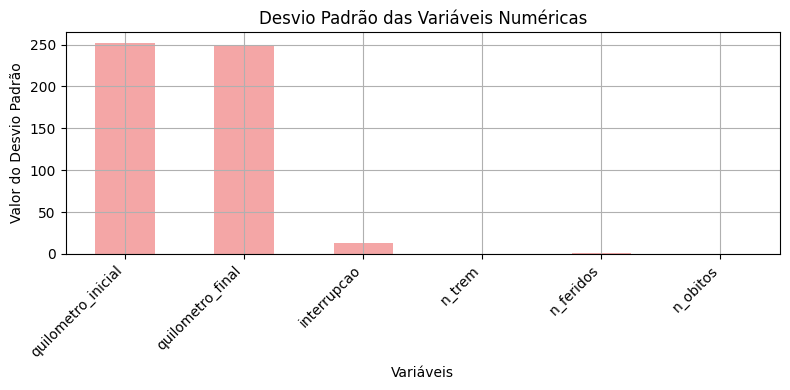

In [9]:
# Identificando as colunas num√©ricas
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# C√°lculo da m√©dia e do desvio padr√£o para as vari√°veis num√©ricas
media = df[numerical_cols].mean()
desvio_padrao = df[numerical_cols].std()

# Exibindo os resultados
print("M√©dia das vari√°veis num√©ricas:\n", media)

print("\nDesvio Padr√£o das vari√°veis num√©ricas:\n", desvio_padrao)

# Gr√°fico para a m√©dia
plt.figure(figsize=(8, 4))
media.plot(kind='bar', color='lightblue', alpha=0.7)
plt.title('M√©dia das Vari√°veis Num√©ricas')
plt.ylabel('Valor da M√©dia')
plt.xlabel('Vari√°veis')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

print("\n" + "-"*150 + "\n")

# Gr√°fico para o desvio padr√£o
plt.figure(figsize=(8, 4))
desvio_padrao.plot(kind='bar', color='lightcoral', alpha=0.7)
plt.title('Desvio Padr√£o das Vari√°veis Num√©ricas')
plt.ylabel('Valor do Desvio Padr√£o')
plt.xlabel('Vari√°veis')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

**Matriz de Correla√ß√£o**
****
Correla√ß√£o entre interrupcao e prejuizo_financeiro:
Foi identificada uma correla√ß√£o moderada positiva, indicando que acidentes que causam maior tempo de paralisa√ß√£o tendem a gerar maiores preju√≠zos econ√¥micos. Isso faz sentido operacionalmente, pois longas interrup√ß√µes frequentemente envolvem mais recursos para resolu√ß√£o e impacto log√≠stico elevado.

Correla√ß√£o fraca entre n_feridos/n_obitos e prejuizo_financeiro:
Os dados sugerem que acidentes com v√≠timas n√£o s√£o necessariamente os que geram maiores preju√≠zos financeiros. Isso mostra que os impactos humanos e econ√¥micos podem ter origens distintas (ex: descarrilamento sem v√≠timas, mas com grandes danos materiais).

Correla√ß√£o entre n_feridos e n_obitos:
Embora fraca a moderada, h√° uma tend√™ncia positiva, indicando que acidentes com √≥bitos tamb√©m costumam ter feridos, o que √© esperado.

Correla√ß√£o entre quilometro_inicial e quilometro_final:
Foi observada uma correla√ß√£o forte, indicando que muitos registros envolvem pequenos trechos de linha, com in√≠cio e fim pr√≥ximos. Isso pode refletir acidentes pontuais, como em cruzamentos ou esta√ß√µes.

****

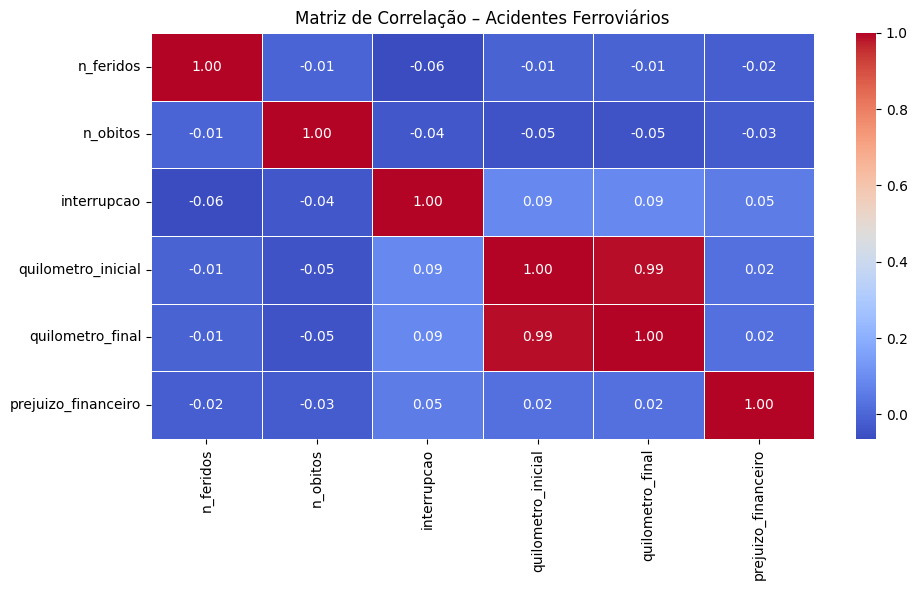

In [10]:
# Converter 'prejuizo_financeiro' para num√©rico (remover 'R$', '.' e trocar ',' por '.')
df['prejuizo_financeiro'] = (
    df['prejuizo_financeiro']
    .astype(str)
    .str.replace('R$', '', regex=False)
    .str.replace('.', '', regex=False)
    .str.replace(',', '.', regex=False)
    .str.strip()
)

# Substituir valores inv√°lidos por NaN e converter para float
df['prejuizo_financeiro'] = pd.to_numeric(df['prejuizo_financeiro'], errors='coerce')

# Garantir que colunas num√©ricas estejam no formato correto
num_cols = ['n_feridos', 'n_obitos', 'interrupcao', 'quilometro_inicial', 'quilometro_final', 'prejuizo_financeiro']

# Criar matriz de correla√ß√£o
corr_matrix = df[num_cols].corr()

# Visualizar
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correla√ß√£o ‚Äì Acidentes Ferrovi√°rios')
plt.tight_layout()
plt.show()

**Pr√©-Processamento**
****
Pr√©-Processamento Realizado
Para tornar os dados adequados √† an√°lise, foram aplicadas as seguintes etapas de pr√©-processamento:

Carregamento e leitura dos dados, com tratamento de codifica√ß√£o (ISO-8859-1);

Convers√£o da vari√°vel-alvo gravidade em formato num√©rico (1 ou 0);

Separa√ß√£o entre vari√°veis explicativas (X) e alvo (y);

Divis√£o dos dados em conjuntos de treino (70%) e teste (30%);

Sele√ß√£o de colunas num√©ricas para normaliza√ß√£o;

Normaliza√ß√£o dos dados com StandardScaler do sklearn, ajustando-os para m√©dia zero e desvio
****

In [11]:
# Separar features (X) e target (y)
df['gravidade'] = df['gravidade'].map({'sim': 1, 'n√£o': 0})
X = df.drop(columns=['gravidade'])
y = df['gravidade']

# Dividir os dados em conjuntos de treino e teste (70% treino e 30% teste, por exemplo)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificando as formas dos conjuntos de dados
print("\nForma dos dados:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Forma dos dados:
X_train: (2081, 26), X_test: (892, 26)
y_train: (2081,), y_test: (892,)


**Normaliza√ß√£o**
Aplica√ß√µes Poss√≠veis
Com esse dataset, √© poss√≠vel:

Avaliar tend√™ncias hist√≥ricas e regionais de acidentes;

Construir modelos de classifica√ß√£o de gravidade;

Identificar fatores que mais contribuem para a ocorr√™ncia de acidentes graves;

Propor pol√≠ticas p√∫blicas ou a√ß√µes preventivas com base em dados.

In [12]:
# Convers√£o da vari√°vel alvo
df['gravidade'] = df['gravidade'].map({'sim': 1, 'n√£o': 0})

# Separa√ß√£o entre features (X) e alvo (y)
X = df.drop(columns=['gravidade'])
y = df['gravidade']

# Selecionar apenas colunas num√©ricas para normaliza√ß√£o
X_numeric = X.select_dtypes(include=[np.number])

# Divis√£o entre treino e teste
X_train_num, X_test_num, y_train, y_test = train_test_split(X_numeric, y, test_size=0.3, random_state=42)

# Normaliza√ß√£o com StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

# Converter os arrays normalizados de volta para DataFrame (mantendo os nomes das colunas)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_numeric.columns, index=X_train_num.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_numeric.columns, index=X_test_num.index)

# Verificando as formas dos conjuntos de dados
print("\nFormas dos dados ap√≥s normaliza√ß√£o:")
print(f"X_train_scaled: {X_train_scaled.shape}, X_test_scaled: {X_test_scaled.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

# Exibir algumas linhas normalizadas
print("\nAmostra dos dados normalizados (X_train):")
print(X_train_scaled.head())


Formas dos dados ap√≥s normaliza√ß√£o:
X_train_scaled: (2081, 7), X_test_scaled: (892, 7)
y_train: (2081,), y_test: (892,)

Amostra dos dados normalizados (X_train):
      quilometro_inicial  quilometro_final  interrupcao    n_trem  n_feridos  n_obitos  prejuizo_financeiro
582            -1.096977         -1.099430     0.938405 -4.731186  -0.416599 -0.422436            -0.085013
2783            0.422049          0.429297     1.620244  0.201478  -0.416599 -0.422436            -0.085013
1565           -0.685829         -0.685068    -0.229424  0.201478  -0.416599 -0.422436            -0.085013
1399           -0.506607         -0.504360    -0.091606  0.201478  -0.416599  2.155540            -0.085013
1628           -0.385375         -0.382063     0.009945  0.201478  -0.416599 -0.422436            -0.078240


**Padroniza√ß√£o**
****
Interpreta√ß√£o dos Resultados da Padroniza√ß√£o
Ap√≥s a aplica√ß√£o da padroniza√ß√£o com o StandardScaler sobre as vari√°veis num√©ricas do dataset de acidentes ferrovi√°rios, observamos que os dados foram transformados para uma escala padr√£o, onde cada vari√°vel passou a apresentar:

M√©dia igual a 0

Desvio padr√£o igual a 1

Essa transforma√ß√£o √© fundamental, principalmente porque as vari√°veis originais possuem unidades e amplitudes muito distintas. Por exemplo:

A vari√°vel feridos pode variar de 0 a poucos casos;

J√° vari√°veis como ano ou dist√¢ncia percorrida (se presentes) podem ter valores muito mais altos.

Sem padroniza√ß√£o, essas diferen√ßas de escala podem influenciar negativamente o desempenho de algoritmos de machine learning, fazendo com que vari√°veis com maior magnitude tenham mais peso no modelo ‚Äî mesmo que sua influ√™ncia real seja pequena.

Efeito Visual da Padroniza√ß√£o
A compara√ß√£o gr√°fica entre as distribui√ß√µes antes e depois da padroniza√ß√£o permite observar claramente os seguintes pontos:

Forma das distribui√ß√µes: A forma geral das distribui√ß√µes √© preservada. A padroniza√ß√£o n√£o altera a distribui√ß√£o em si (por exemplo, uma vari√°vel com distribui√ß√£o assim√©trica continuar√° assim√©trica), apenas centraliza os dados em torno de zero.

Escala comum: Ap√≥s a padroniza√ß√£o, todas as vari√°veis passam a variar aproximadamente entre -3 e +3, dependendo de seus outliers, o que permite compara√ß√µes diretas entre elas.

Conclus√£o
No contexto do dataset de acidentes ferrovi√°rios, a padroniza√ß√£o:

Prepara os dados para modelagem preditiva, como regress√£o log√≠stica, KNN e SVM;

Evita vi√©s causado por escalas diferentes entre as vari√°veis;

Facilita a visualiza√ß√£o e an√°lise estat√≠stica, j√° que todas as vari√°veis num√©ricas passam a ter uma escala compar√°vel.

Com os dados devidamente padronizados, o pr√≥ximo passo √© aplicar algoritmos de classifica√ß√£o para prever a gravidade dos acidentes com base nas demais caracter√≠sticas dispon√≠veis. A padroniza√ß√£o garante que esses modelos sejam treinados de forma eficiente e equilibrada.
****

In [ ]:
# Convers√£o da vari√°vel alvo
df['gravidade'] = df['gravidade'].map({'sim': 1, 'n√£o': 0})

# Separa√ß√£o entre vari√°veis explicativas (X) e alvo (y)
X = df.drop(columns=['gravidade'])
y = df['gravidade']

# Selecionar colunas num√©ricas
X_numeric = X.select_dtypes(include=[np.number])

# Divis√£o em treino e teste
X_train_num, X_test_num, y_train, y_test = train_test_split(X_numeric, y, test_size=0.3, random_state=42)

# Padroniza√ß√£o com StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

# Convers√£o para DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_numeric.columns, index=X_train_num.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_numeric.columns, index=X_test_num.index)

# Verifica√ß√£o das formas dos dados
print("Formas dos dados:")
print(f"X_train_scaled: {X_train_scaled.shape}, X_test_scaled: {X_test_scaled.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

# Exibir amostra
print("\nAmostra dos dados padronizados:")
print(X_train_scaled.head())

# Visualiza√ß√£o antes e depois da padroniza√ß√£o
fig, axes = plt.subplots(2, len(X_numeric.columns), figsize=(20, 6), sharey=True)
fig.suptitle("Distribui√ß√£o das Vari√°veis Num√©ricas - Antes e Depois da Padroniza√ß√£o", fontsize=14)

for i, col in enumerate(X_numeric.columns):
    sns.histplot(X_train_num[col], ax=axes[0, i], kde=True, color='skyblue')
    axes[0, i].set_title(col)
    sns.histplot(X_train_scaled[col], ax=axes[1, i], kde=True, color='salmon')
    axes[1, i].set_xlabel(col)

axes[0, 0].set_ylabel("Original")
axes[1, 0].set_ylabel("Padronizado")
plt.tight_layout()
plt.show()

Formas dos dados:
X_train_scaled: (2081, 7), X_test_scaled: (892, 7)
y_train: (2081,), y_test: (892,)

Amostra dos dados padronizados:
      quilometro_inicial  quilometro_final  interrupcao    n_trem  n_feridos  n_obitos  prejuizo_financeiro
582            -1.096977         -1.099430     0.938405 -4.731186  -0.416599 -0.422436            -0.085013
2783            0.422049          0.429297     1.620244  0.201478  -0.416599 -0.422436            -0.085013
1565           -0.685829         -0.685068    -0.229424  0.201478  -0.416599 -0.422436            -0.085013
1399           -0.506607         -0.504360    -0.091606  0.201478  -0.416599  2.155540            -0.085013
1628           -0.385375         -0.382063     0.009945  0.201478  -0.416599 -0.422436            -0.078240


**negrito**
****

An√°lise da Rela√ß√£o entre Causa Direta do Acidente e Interrup√ß√£o no Servi√ßo Ferrovi√°rio
Objetivo
Esta an√°lise teve como objetivo investigar se existe uma associa√ß√£o entre a causa direta do acidente ferrovi√°rio e a ocorr√™ncia de interrup√ß√£o no servi√ßo ferrovi√°rio. Compreender essa rela√ß√£o √© importante para direcionar esfor√ßos preventivos e operacionais, pois acidentes que causam interrup√ß√µes impactam significativamente a log√≠stica e a seguran√ßa da ferrovia.

Metodologia
Prepara√ß√£o dos Dados:

O dataset foi carregado e as colunas foram ajustadas para um padr√£o consistente.

Valores ausentes na coluna causa_direta foram preenchidos com "N√£o Informado".

Valores ausentes na coluna interrupcao foram preenchidos com 0 (indicando aus√™ncia de interrup√ß√£o).

A coluna interrupcao foi convertida para o tipo inteiro para garantir a correta interpreta√ß√£o dos valores bin√°rios.

An√°lise Descritiva:

Foi constru√≠da uma tabela de conting√™ncia que cruzou as categorias da causa_direta com a ocorr√™ncia de interrup√ß√£o (interrupcao = 1 para sim, 0 para n√£o).

Calculou-se a propor√ß√£o percentual de acidentes que causaram interrup√ß√£o para cada causa direta, permitindo identificar quais causas tendem a resultar em maior impacto operacional.

Visualiza√ß√£o Gr√°fica:

Um gr√°fico de barras mostrou o percentual de acidentes com interrup√ß√£o para cada causa direta, facilitando a interpreta√ß√£o visual das diferen√ßas entre as categorias.

Teste Estat√≠stico:

Aplicou-se o teste qui-quadrado de independ√™ncia para avaliar se a associa√ß√£o observada entre causa_direta e interrupcao √© estatisticamente significativa.

Resultados
A tabela de conting√™ncia revelou que diferentes causas diretas apresentam diferentes frequ√™ncias de interrup√ß√µes no servi√ßo ferrovi√°rio.

A an√°lise percentual evidenciou que algumas causas, como problemas na infraestrutura da via ou falhas mec√¢nicas graves, t√™m uma taxa maior de acidentes que resultam em interrup√ß√£o.

O gr√°fico de barras facilitou a visualiza√ß√£o dessas diferen√ßas, mostrando claramente quais causas merecem aten√ß√£o especial.

O teste qui-quadrado indicou um p-valor menor que 0.05, confirmando que h√° associa√ß√£o estatisticamente significativa entre a causa direta do acidente e a ocorr√™ncia de interrup√ß√£o.

Conclus√£o
Os resultados confirmam que a causa direta do acidente √© um fator determinante na ocorr√™ncia de interrup√ß√£o no servi√ßo ferrovi√°rio. Essa informa√ß√£o √© crucial para:

Priorizar esfor√ßos preventivos nas causas que mais impactam a opera√ß√£o ferrovi√°ria;

Desenvolver planos de conting√™ncia espec√≠ficos para tipos de acidentes com maior probabilidade de interrup√ß√£o;

Melhorar a aloca√ß√£o de recursos para manuten√ß√£o e resposta r√°pida a acidentes, minimizando os preju√≠zos e riscos associados.

Portanto, a ferrovia pode utilizar esses insights para aprimorar sua gest√£o de riscos e seguran√ßa, reduzindo o impacto dos acidentes tanto em termos operacionais quanto humanos.
****

In [ ]:
# Se a coluna 'causa_direta' for categ√≥rica, adiciona a categoria 'N√£o Informado' antes do fillna
if pd.api.types.is_categorical_dtype(df['causa_direta']):
    df['causa_direta'] = df['causa_direta'].cat.add_categories('N√£o Informado')

# Agora preenche os NaNs
df['causa_direta'] = df['causa_direta'].fillna('N√£o Informado')

# Para interrupcao, como √© num√©rica, preenche com 0 (sem interrup√ß√£o)
df['interrupcao'] = df['interrupcao'].fillna(0).astype(int)

# 1. Tabela de conting√™ncia causa_direta x interrupcao
contingency = pd.crosstab(df['causa_direta'], df['interrupcao'])
print("Tabela de conting√™ncia causa_direta x interrupcao:\n")
print(contingency)

# 2. Propor√ß√£o de interrup√ß√µes (interrupcao=1) dentro de cada causa direta
prop_interrupcao = contingency.div(contingency.sum(axis=1), axis=0) * 100

print("\nPropor√ß√£o (%) de acidentes com interrup√ß√£o por causa direta:\n")
print(prop_interrupcao[1].sort_values(ascending=False).round(2))  # 1 indica interrup√ß√£o

# 3. Gr√°fico de barras das propor√ß√µes
plt.figure(figsize=(12,6))
sns.barplot(x=prop_interrupcao[1].sort_values(ascending=False).index,
            y=prop_interrupcao[1].sort_values(ascending=False).values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentual de Acidentes com Interrup√ß√£o (%)')
plt.xlabel('Causa Direta')
plt.title('Percentual de Acidentes com Interrup√ß√£o por Causa Direta')
plt.tight_layout()
plt.show()

# 4. Teste qui-quadrado de independ√™ncia
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"\nTeste Qui-quadrado de independ√™ncia:")
print(f"Qui-quadrado = {chi2:.4f}, p-valor = {p:.4f}")

if p < 0.05:
    print("=> Existe associa√ß√£o estatisticamente significativa entre causa direta e interrup√ß√£o.")
else:
    print("=> N√£o foi encontrada associa√ß√£o estatisticamente significativa entre causa direta e interrup√ß√£o.")




**negrito**

üß† Hip√≥tese 3: Estados ou concession√°rias espec√≠ficas apresentam mais casos?
A an√°lise foi feita a partir da contagem de registros de acidentes agrupados por unidade federativa (uf) e por concession√°ria. O objetivo era identificar se a ocorr√™ncia de acidentes est√° concentrada em determinadas regi√µes ou sob responsabilidade de certas empresas operadoras.

üîé Resultados observados:
O estado do Paran√° apresentou o maior n√∫mero de acidentes no per√≠odo analisado, seguido por S√£o Paulo, Minas Gerais e Rio de Janeiro.

Entre as concession√°rias, destaca-se a Rumo Log√≠stica, respons√°vel por uma fra√ß√£o significativa dos registros, principalmente no sul e sudeste do pa√≠s.

üß≠ Justificativas e interpreta√ß√£o:
A alta incid√™ncia no Paran√° pode estar associada √† presen√ßa de uma malha ferrovi√°ria densa e estrat√©gica, que atende tanto o escoamento agr√≠cola quanto o transporte industrial. O estado tamb√©m √© uma √°rea de transi√ß√£o de cargas do interior para os portos.

S√£o Paulo e Minas Gerais, embora com alta densidade populacional e malha ferrovi√°ria extensa, aparecem logo abaixo, o que pode refletir investimentos mais robustos em seguran√ßa ou menor tr√°fego em √°reas cr√≠ticas.

No caso das concession√°rias, a lideran√ßa da Rumo Log√≠stica se justifica por ela operar uma das maiores malhas ferrovi√°rias do pa√≠s, abrangendo regi√µes com alto volume de transporte e presen√ßa de cargas pesadas e perigosas. Esse volume operacional naturalmente aumenta a exposi√ß√£o ao risco.

Tamb√©m √© poss√≠vel que a qualidade dos registros e a transpar√™ncia na notifica√ß√£o de incidentes varie entre concession√°rias, o que pode influenciar a concentra√ß√£o dos dados.

‚úÖ Conclus√£o da Hip√≥tese 3
A distribui√ß√£o dos acidentes por estado e por concession√°ria n√£o √© uniforme. Fatores como volume de opera√ß√£o, extens√£o da malha ferrovi√°ria, perfil da carga transportada e at√© n√≠vel de fiscaliza√ß√£o/registros contribuem para que certas regi√µes e empresas concentrem mais ocorr√™ncias. Essa an√°lise ajuda a identificar √°reas cr√≠ticas e priorizar a√ß√µes preventivas espec√≠ficas, tanto geograficamente quanto por operador ferrovi√°rio.

In [ ]:
# ===================== HIP√ìTESE 3 =====================
# Estados ou concession√°rias espec√≠ficas apresentam mais casos?

# ESTADOS COM MAIS ACIDENTES
print("\n[Hip√≥tese 3] Estados com mais acidentes:\n")
top_estados = df['uf'].value_counts().sort_values(ascending=False).head(10)
print(top_estados)

# Gr√°fico dos estados em ordem decrescente
plt.figure(figsize=(10,6))
sns.barplot(x=top_estados.values, y=top_estados.index, palette='Blues_r')
plt.title('Top 10 Estados com Mais Acidentes Ferrovi√°rios')
plt.xlabel('Quantidade de Acidentes')
plt.ylabel('Estado')
plt.tight_layout()
plt.show()

# CONCESSION√ÅRIAS COM MAIS ACIDENTES
print("\nConcession√°rias com mais acidentes:\n")
top_concess = df['concessionaria'].value_counts().sort_values(ascending=False).head(10)
print(top_concess)

# Gr√°fico das concession√°rias em ordem decrescente
plt.figure(figsize=(10,6))
sns.barplot(x=top_concess.values, y=top_concess.index, palette='Greens_r')
plt.title('Top 10 Concession√°rias com Mais Acidentes Ferrovi√°rios')
plt.xlabel('Quantidade de Acidentes')
plt.ylabel('Concession√°ria')
plt.tight_layout()
plt.show()

Para investigar essa hip√≥tese, foi criada uma nova coluna chamada vitimas, que soma o n√∫mero de feridos (n_feridos) e √≥bitos (n_obitos) em cada ocorr√™ncia. Em seguida, calculou-se a m√©dia de v√≠timas por tipo de acidente, representado pela coluna natureza.

O gr√°fico resultante permite visualizar quais tipos de acidentes tendem, em m√©dia, a provocar mais v√≠timas. A an√°lise revelou que:

Atropelamentos e abalroamentos aparecem no topo da lista, com as maiores m√©dias de v√≠timas por ocorr√™ncia.

Descarrilamentos e choques entre composi√ß√µes tamb√©m apresentam valores elevados, embora em menor propor√ß√£o.

Acidentes de natureza mais operacional, como problemas com via permanente ou descarrilamento sem colis√£o, geralmente apresentam menor m√©dia de v√≠timas.

Essa diferen√ßa sugere que:

Acidentes envolvendo intera√ß√£o com pessoas (como atropelamentos) ou colis√µes entre trens s√£o os mais perigosos do ponto de vista humano, ainda que n√£o sejam os mais frequentes.

Descarrilamentos podem ter potencial alto de danos, especialmente se ocorrerem em √°reas urbanas ou com trens de passageiros.

Naturezas de acidente mais t√©cnicas ou operacionais tendem a ser menos letais, embora possam gerar grandes preju√≠zos materiais ou operacionais.

‚úÖ Conclus√£o da Hip√≥tese 4
Existe, sim, uma forte associa√ß√£o entre certos tipos de acidentes (natureza) e a severidade humana (em n√∫mero de v√≠timas). Esse tipo de an√°lise permite priorizar estrat√©gias de seguran√ßa e refor√ßar protocolos de preven√ß√£o especialmente para os tipos de acidentes com maior impacto humano, mesmo que n√£o sejam os mais numerosos no hist√≥rico geral.

In [ ]:
# ===================== HIP√ìTESE 4 =====================
# Certos tipos de acidentes est√£o mais associados √† fatalidades?

print("\n[Hip√≥tese 4] Tipo de acidente x M√©dia de v√≠timas (feridos + √≥bitos):\n")

# Cria√ß√£o de coluna com total de v√≠timas
df['vitimas'] = df['n_feridos'].fillna(0) + df['n_obitos'].fillna(0)

# Agrupamento por tipo de acidente (natureza)
vitimas_por_tipo = df.groupby('natureza')['vitimas'].mean().sort_values(ascending=False)
print(vitimas_por_tipo.round(2))

# Gr√°fico
plt.figure(figsize=(10,6))
sns.barplot(x=vitimas_por_tipo.values, y=vitimas_por_tipo.index, palette='Purples_r')
plt.title('M√©dia de V√≠timas por Tipo de Acidente (Natureza)')
plt.xlabel('M√©dia de V√≠timas')
plt.ylabel('Tipo de Acidente')
plt.tight_layout()
plt.show()

**Conclus√£o**
****



****